<a href="https://colab.research.google.com/github/AnkitaSK/AB-Image-Classification/blob/BitWhisperer/mainCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
from keras.backend import clear_session
clear_session()

Data Preprocessing



In [226]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [227]:

# separating training and validation set
X_valid = X_train[:10000]
X_train = X_train[10000:]

y_valid = y_train[:10000]
y_train = y_train[10000:]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [228]:
y_train

array([[1],
       [6],
       [6],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

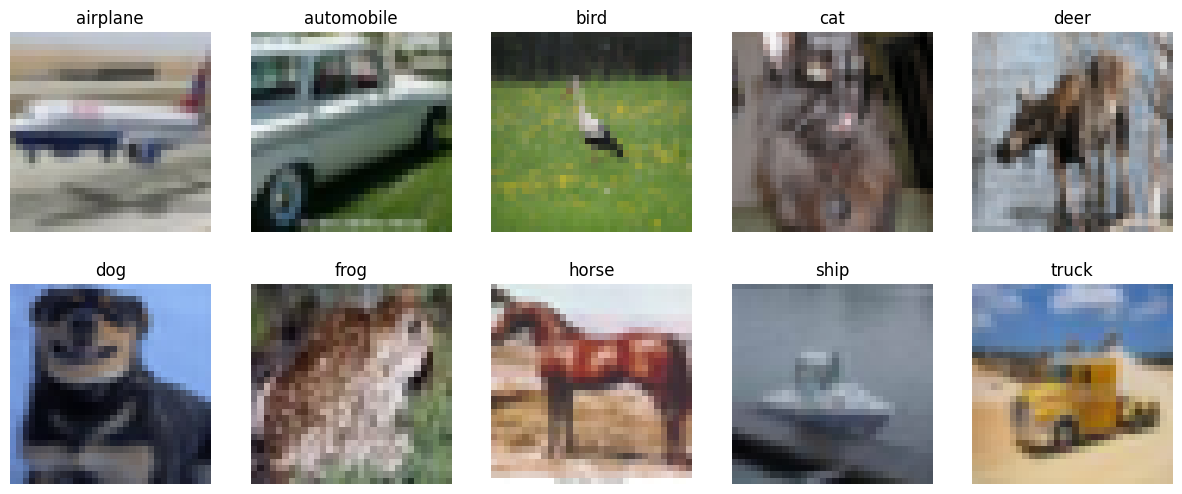

In [229]:

#Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # Define the class names

# Create a 10x10 grid of plots to display the images and their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# Flatten the axes into a 1D array
axes = axes.flatten()

# Set random seed for reproducibility
np.random.seed(42)

# Loop through each class and select 10 random samples
for class_index in range(10):
    class_samples = np.where(y_train == class_index)[0]
    random_sample = np.random.choice(class_samples, 1, replace=False)
    sample_index = random_sample[0]
    ax = axes[class_index]
    ax.imshow(X_train[sample_index])
    ax.set_title(class_names[class_index])
    ax.axis('off')


plt.show()


Data Normalization and Agumentation


In [230]:
#normalize the data by dividing by 255 to scale the pixel values between 0 and 1

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255

print('shape of x train normalized', X_train.shape)
print('shape of x test normalized', X_test.shape)
print('shape of x train validation', X_valid.shape)


shape of x train normalized (40000, 32, 32, 3)
shape of x test normalized (10000, 32, 32, 3)
shape of x train validation (10000, 32, 32, 3)


In [231]:
from tensorflow.keras.utils import to_categorical

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert the labels to one-hot encoded form.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [1]
After conversion to categorical one-hot encoded labels:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Data augmentation

In [232]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,          # Random rotation by 15 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally by 10%
    height_shift_range=0.1,     # Randomly shift images vertically by 10%
    horizontal_flip=True,       # Randomly flip images horizontally
    zoom_range=0.1              # Random zoom by 10%
)

# Fit the data generator to the training data
datagen.fit(X_train)

Model Architecture

In [233]:
# design CNN suitable for image classification
# Include convolutional layers, pooling layers, and fully connected layers.
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# define model
def cnn_model():
  model = Sequential()

  # conv block 1: 32 filters, Maxpool
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # conv block 2: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # conv block 3: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # flatten the convolutional features
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  # fully connected 10 output layers because we have 10 classes in our dataset
  model.add(Dense(10, activation='softmax'))

  model.build()

  return model

In [234]:
model = cnn_model()
model.build

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<function keras.src.models.sequential.Sequential.build(input_shape=None)>

In [235]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [236]:
# compile the model
# we use categorical_crossentropy since our labels are one-hot encoded
model.compile(
    optimizer= 'adam',#'adam',#'rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [237]:
from dataclasses import dataclass

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 50
    BATCH_SIZE:    int = 256

In [238]:
# train the model
history = model.fit(
    X_train,
    y_train,
    batch_size = TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2624 - loss: 1.9832 - val_accuracy: 0.4743 - val_loss: 1.4252
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4987 - loss: 1.3841 - val_accuracy: 0.5719 - val_loss: 1.1927
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5961 - loss: 1.1273 - val_accuracy: 0.5997 - val_loss: 1.1221
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6639 - loss: 0.9506 - val_accuracy: 0.6604 - val_loss: 0.9727
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7094 - loss: 0.8247 - val_accuracy: 0.6779 - val_loss: 0.9232
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7484 - loss: 0.7107 - val_accuracy: 0.7062 - val_loss: 0.8563
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7876 - loss: 0.6069 - val_accuracy: 0.7111 - val_loss: 0.8543
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8215 - loss: 0.5125 - val_accuracy: 0

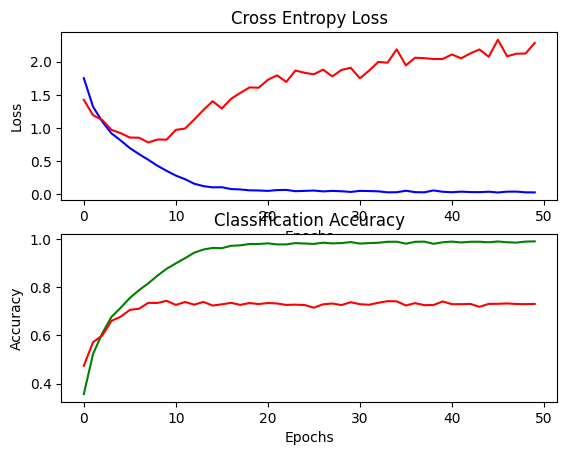

In [239]:
#plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


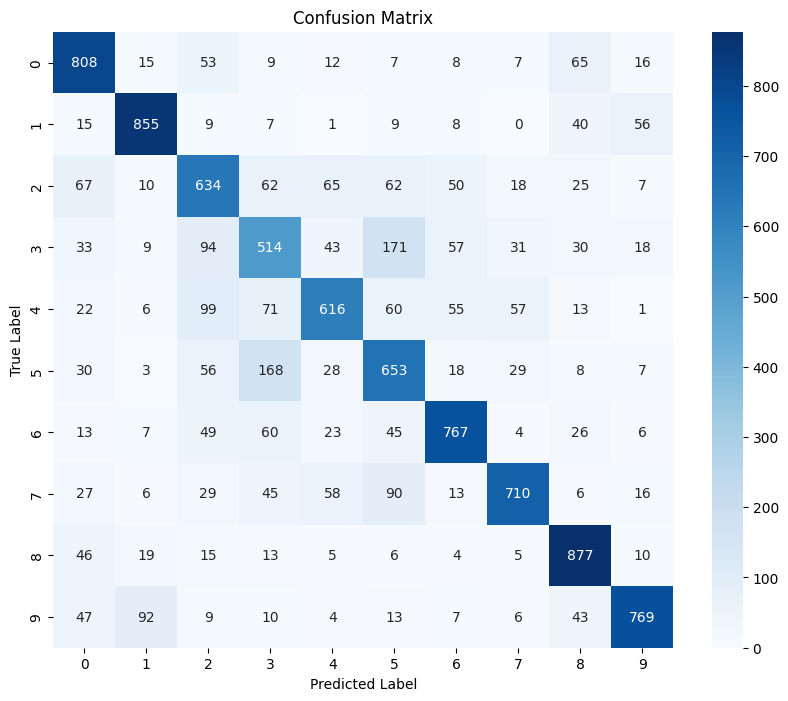

In [240]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

y_pred = model.predict(X_test)

predictions = np.argmax(y_pred, axis=1)
gt = np.argmax(y_test, axis=1)
cm = confusion_matrix(gt, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [241]:
from sklearn.metrics import classification_report, accuracy_score

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Text loss: ', test_loss)
print('Test accuracy: ', test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7244 - loss: 2.3620
Text loss:  2.3622779846191406
Test accuracy:  0.720300018787384


In [242]:
# adding Dropout to the model
from tensorflow.keras import layers

# define model
def cnn_model_dropout():
  model = Sequential()

  # conv block 1: 32 filters, Maxpool
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  # conv block 2: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  # conv block 3: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  # flatten the convolutional features
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  # fully connected 10 output layers because we have 10 classes in our dataset
  model.add(Dense(10, activation='softmax'))

  return model

In [243]:
# define model checkpoint callback
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    verbose=1
)

In [244]:
# early stopping
# for us, applying early stop reduces the val_accuracy
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
    )

In [245]:
# create the model
model_dropout = cnn_model_dropout()
model_dropout.summary()

# compile dropout mode
model_dropout.compile(
    optimizer='adam',#'sgd',#'adam',#'rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train dropout model
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    batch_size = TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2275 - loss: 2.0547
Epoch 1: val_loss improved from inf to 1.58528, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.2280 - loss: 2.0535 - val_accuracy: 0.4111 - val_loss: 1.5853
Epoch 2/50
148/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4173 - loss: 1.5616
Epoch 2: val_loss improved from 1.58528 to 1.39745, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4192 - loss: 1.5573 - val_accuracy: 0.4960 - val_loss: 1.3974
Epoch 3/50
151/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5145 - loss: 1.3408
Epoch 3: val_loss improved from 1.39745 to 1.19608, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5154 - loss: 1.3386 - val_accuracy: 0.5657 - val_loss: 1.1961
Epoch 4/50
151/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5801 - loss: 1.1651
Epoch 4: val_loss improved from 1.19608 to 1.09724,

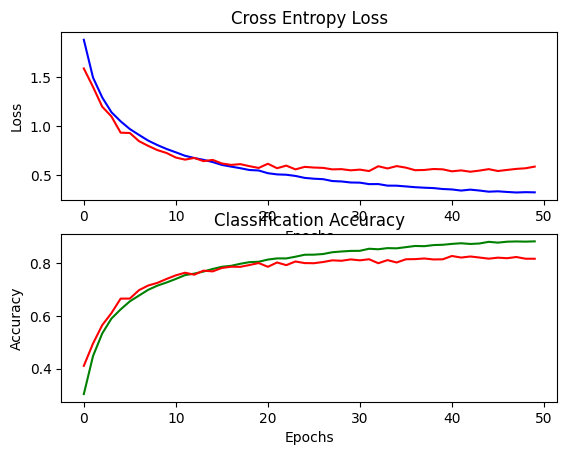

In [246]:
# TODO - optimise
#plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_dropout.history['loss'], color='blue', label='train')
plt.plot(history_dropout.history['val_loss'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_dropout.history['accuracy'], color='green', label='train')
plt.plot(history_dropout.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


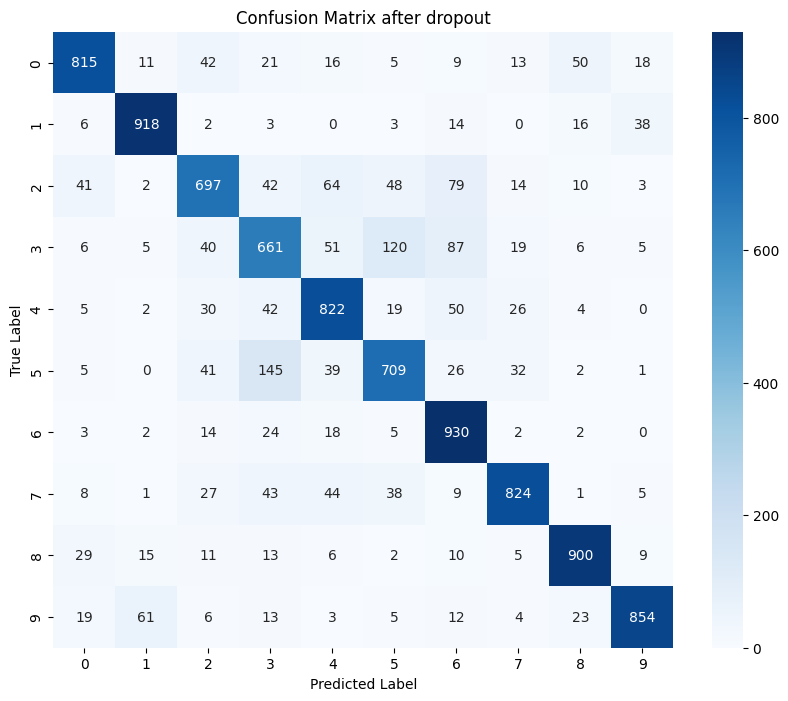

In [247]:
# TODO optimise
y_pred_dropout = model_dropout.predict(X_test)

predictions = np.argmax(y_pred_dropout, axis=1)
gt_dropout = np.argmax(y_test, axis=1)
cm_dropout = confusion_matrix(gt_dropout, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dropout, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix after dropout')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [248]:
test_loss, test_accuracy = model_dropout.evaluate(X_test, y_test)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8182 - loss: 0.6063
Test loss:  0.6231585741043091
Test accuracy:  0.8130000233650208


Transfer learning

In [249]:
# choose pretrained model
# base_model = model_dropout

In [250]:
# freeze all layers
# base_model.trainable = False

In [251]:
# base_model.summary()

In [252]:
# Add custom layers for CIFAR-10 classification
# new_model = Sequential([
#     base_model,
#     # layers.GlobalAveragePooling2D(),
#     Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     Dense(10, activation='softmax')
# ])

In [253]:
# Compile the model with frozen layers
# new_model.compile(
#     optimizer= 'adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

In [254]:
# Train the model (only the top custom layers will be trained)
# new_model.fit(
#     X_train,
#     y_train,
#     epochs=50,
#     validation_data=(X_test, y_test)
# )

In [255]:
# Unfreeze the base model for fine-tuning
# new_model.trainable = True

In [256]:
# new_model.summary()

In [257]:
# Fine-tuning: Recompile with a lower learning rate
# new_model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

In [258]:
# Fine-tune the model (train the unfrozen layers)
# history_fine = new_model.fit(
#     X_train,
#     y_train,
#     epochs=50,
#     validation_data=(X_test, y_test)
# )


In [259]:
# print(new_model.evaluate(X_test, y_test))

In [262]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model with pretrained ImageNet weights, excluding the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model (initially)
base_model.trainable = False

# Add custom layers for CIFAR-10 classification
model = Sequential([
    base_model,  # Add the pretrained model (frozen initially)
    layers.GlobalAveragePooling2D(),  # Convert 4D tensor to 2D
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

# Compile the model with frozen layers
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (only the top custom layers will be trained)
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Unfreeze the base model for fine-tuning
# base_model.trainable = True
for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
    layer.trainable = True

# Fine-tuning: Recompile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model (train the unfrozen layers)
history_fine = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the final model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nFine-tuned test accuracy: {test_acc:.4f}')

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.1032 - loss: 2.3459 - val_accuracy: 0.1003 - val_loss: 2.3027
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.0980 - loss: 2.3028 - val_accuracy: 0.1001 - val_loss: 2.3026
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.0979 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1026 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1017 - loss: 2.3025 - val_accuracy: 0.1001 - val_loss: 2.3026
Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.1125 - loss: 2.3220 - val_accuracy: 0.2079 - val_loss: 2.2097
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1855 - loss: 2.1920 - val_accuracy: 0.2854 - val_loss: 2.0322
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2418 - loss: 2.0839 - val_